# PCD Assignment 01
### Nama: Hizkya Firstadipa Hartoko
### NIM: 20/455447/PA/19662

## Importing Library

- pyplot to plot histogram

- cv2 to process image

- numpy for math functions

In [24]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Load Image

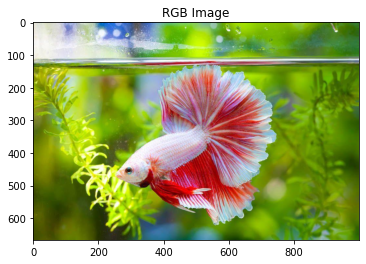

In [25]:
image = cv2.imread('cupang.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title('RGB Image')
plt.imshow(image)

## Image Histogram

### RGB Histogram

Because img has 3 channer (Red,Green,Blue), each channel have to be plotted

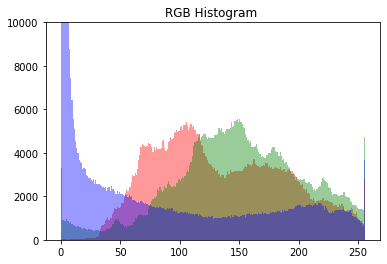

In [26]:
plt.hist(image[:,:,0].ravel(), bins=256, range=(0, 256), color='red', alpha=0.4) 
plt.hist(image[:,:,1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.4) 
plt.hist(image[:,:,2].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.4) 
plt.gca().set_ylim(0,10000)
plt.title('RGB Histogram ')
plt.show()

### Grayscale Histogram

#### Converting to Grayscale

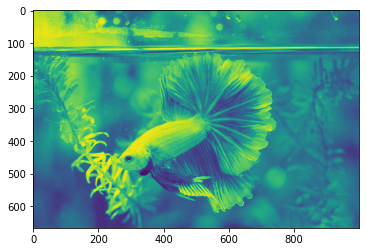

In [27]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)

### Plotting Histogram

Grayscale only has 1 channel

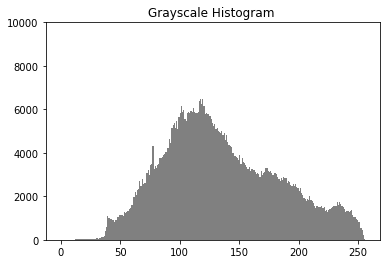

In [28]:
plt.hist(gray_image.ravel(), bins=256, range=(0, 256), color='gray') 
plt.gca().set_ylim(0,10000)
plt.title('Grayscale Histogram ')
plt.show()

## Non-Uniform Quantization

#### Mean Quantization

In [29]:
def mean_quantization(gray_image=gray_image, q_level=8):
    # sort pixel intensity of gray image by ascending
    sorted_PI = gray_image.copy()
    sorted_PI = sorted_PI.ravel()
    sorted_PI.sort()

    # Make new empty list for indexing, with start and end
    index_list = []
    index_list.append([])
    index_list[-1].append(0)
    index_list[-1].append(0)
    index_list.append([])
    index_list[-1].append(len(sorted_PI))
    index_list[-1].append(256)

    # Fill array index_list based on image data and quantization level (q_level)
    for i in range(int(np.log2(q_level))):
        length = len(index_list)
        for i in range(length-1):
            # Get the partial list to work with
            partial_list = sorted_PI[int(index_list[i][0]):int(index_list[i+1][0])]

            # Get last mean value in list
            last_mean_value = int(partial_list.mean())

            # Get index of last mean value in list. Return index+1 of the value
            last_mean_index = np.where(sorted_PI == last_mean_value)[0][-1]+1

            # Insert index and value of mean to index_list
            index_list.append([])
            index_list[-1].append(last_mean_index)
            index_list[-1].append(last_mean_value)

        index_list.sort()

    # Get mean value for each part of the graph
    for i in range (len(index_list)-1):
        partial_list = sorted_PI[int(index_list[i][0]):int(index_list[i+1][0])]

        mean = int(partial_list.mean())
        
        index_list[i+1].append(mean)

    # Create copy of grayscale image
    result = gray_image.copy()

    rows = result.shape[0]
    cols = result.shape[1]

    for i in range (rows):
        for j in range (cols):
            
            for k in range (len(index_list)-1):
                if(result[i][j] > index_list[k][1]) and (result[i][j] <= index_list[k+1][1]):
                    result[i][j] = index_list[k+1][2]
                    break
                

    return result

#### Median Quantization

In [30]:
def median_quantization(gray_image=gray_image,q_level=8):

    # sort pixel intensity of gray image by ascending
    sorted_PI = gray_image.copy()
    sorted_PI = sorted_PI.ravel()
    sorted_PI.sort()

    # Make new empty list for indexing, with start and end
    index_list = []
    index_list.append([])
    index_list[-1].append(0)
    index_list[-1].append(0)
    index_list.append([])
    index_list[-1].append(len(sorted_PI))
    index_list[-1].append(256)

    # Fill array index_list based on image data and quantization level (q_level)
    for i in range(int(np.log2(q_level))):
        length = len(index_list)
        for i in range(length-1):
            # Get the partial list to work with
            partial_list = sorted_PI[int(index_list[i][0]):int(index_list[i+1][0])]

            # Get last median value in list
            last_median_value = int(np.median(partial_list))

            # Get index of last median value in list. Return index+1 of the value
            last_median_index = np.where(sorted_PI == last_median_value)[0][-1]+1

            # Insert index and value of median to index_list
            index_list.append([])
            index_list[-1].append(last_median_index)
            index_list[-1].append(last_median_value)

        index_list.sort()

    # Get mean value for each part of the graph
    for i in range (len(index_list)-1):
        partial_list = sorted_PI[int(index_list[i][0]):int(index_list[i+1][0])]
        index_list[i+1].append(int(partial_list.mean()))

    # Create copy of gray image
    result = gray_image.copy()

    rows = result.shape[0]
    cols = result.shape[1]

    for i in range (rows):
        for j in range (cols):
            
            for k in range (len(index_list)-1):
                if(result[i][j] > index_list[k][1]) and (result[i][j] <= index_list[k+1][1]):
                    result[i][j] = index_list[k+1][2]
                    break
                else:
                    continue 
    
    return result

#### Method to display result

In [31]:
def display_result(result_data):

    rd = result_data

    title = str( " Quantized with " + rd['method'] + " and Q-level = " + str(rd['q_level']))

    plt.figure(figsize=(14,6))
    plt.title('Grayscale Image')
    plt.subplot(121)
    plt.title(title)
    plt.imshow(rd['result'], cmap='gray')
    plt.subplot(122)
    plt.title(title)
    plt.hist(rd['result'].ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)
    plt.show()

    return

### Non-Uniform Quantization method

How to use:

image is required parameter
- Default q-level = 8, and using mean
```python
non_uniform_quantization(image=image)
```

- Default using mean, with set q-level by 4
```python
non_uniform_quantization(image=image, q_level=4)
```
- Using median method and set q-level by 4
```python
non_uniform_quantization(image=image, q_level=4, method='median')
```


In [32]:
def non_uniform_quantization(image=image, q_level=8, method='mean'):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    result = gray_image.copy()

    # check method is correct
    if method == 'mean':
        result = mean_quantization(gray_image, q_level)
    elif method == 'median':
        result = median_quantization(gray_image, q_level)
    else: return 'unknown method'

    # store result data in object
    result_data = {
        'result': result,
        'q_level': q_level,
        'method': method
    }

    # display result
    display_result(result_data=result_data)
    
    return

#### Mean Quantization with Q-level = 8

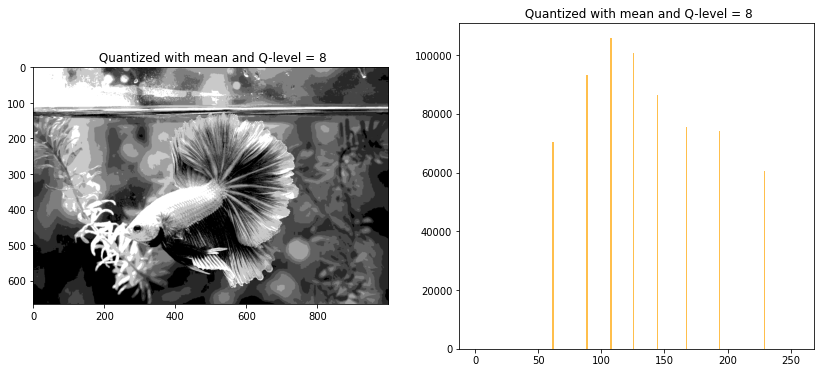

In [33]:
non_uniform_quantization(image=image)

#### Mean Quantization with Q-level = 4

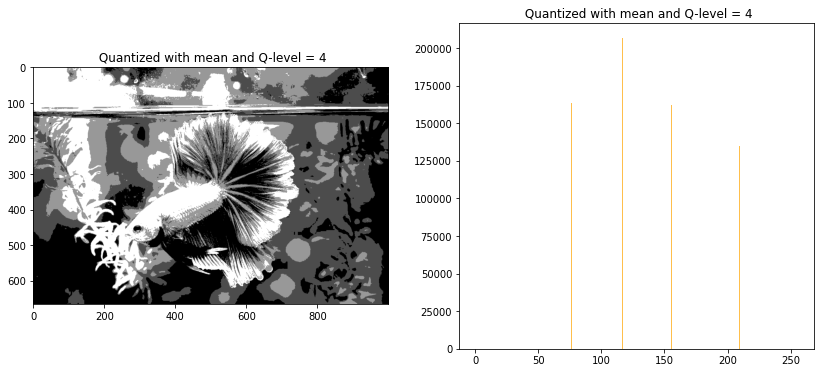

In [34]:
non_uniform_quantization(image=image, q_level=4)

#### Mean Quantization with Q-level = 2

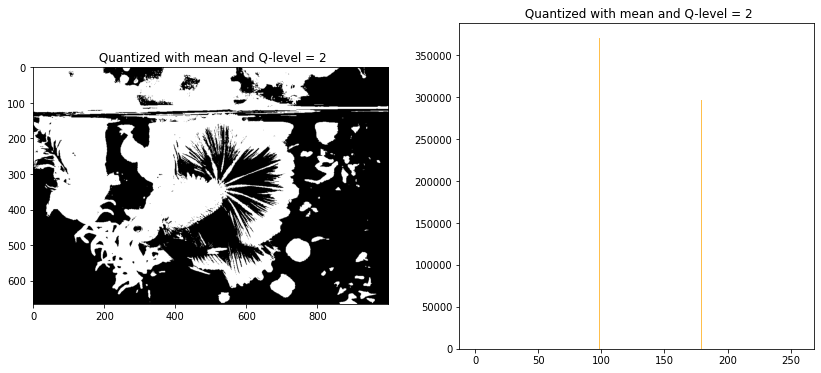

In [35]:
non_uniform_quantization(image=image, q_level=2)

#### Median Quantization with Q-level = 8

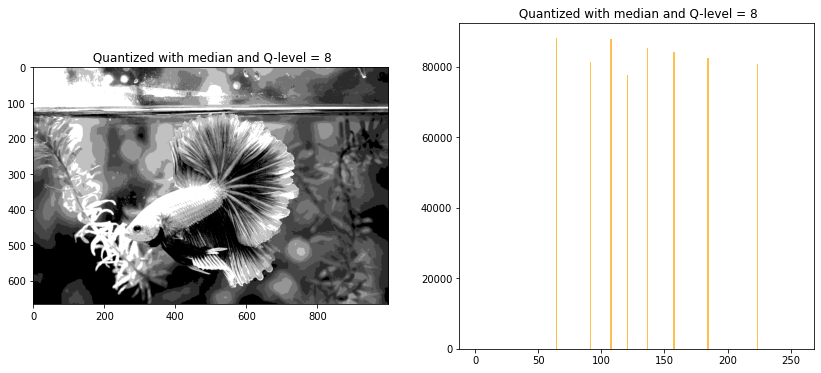

In [36]:
non_uniform_quantization(image=image, method='median')

#### Median Quantization with Q-level = 4

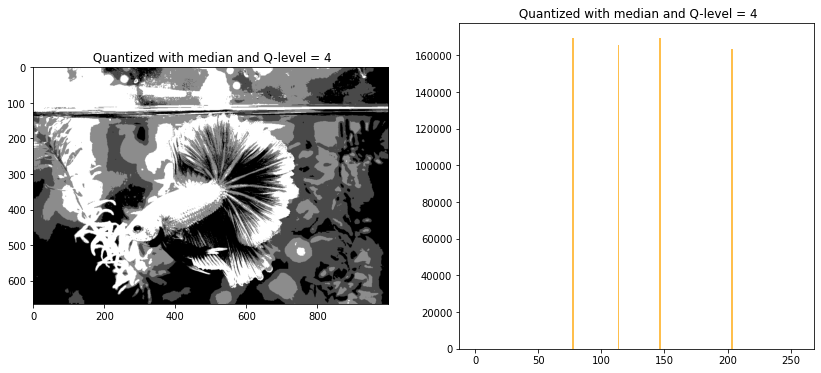

In [37]:
non_uniform_quantization(image=image, q_level=4, method='median')

#### Median Quantization with Q-level = 2

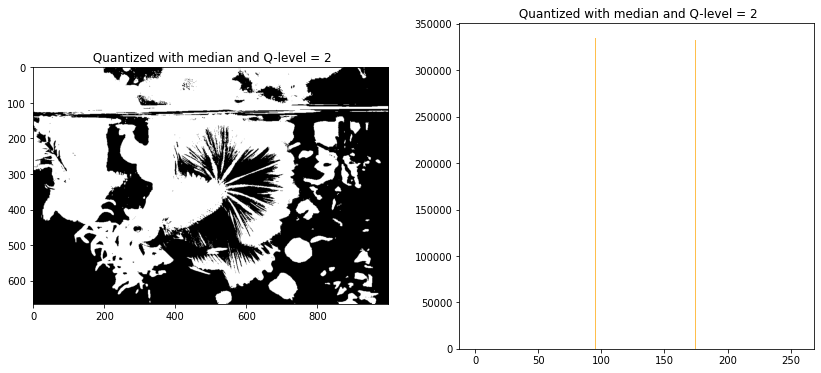

In [38]:
non_uniform_quantization(image=image,q_level=2, method='median')